In [10]:
from MetricLearning.src.metric_learning_adjacent.build_graphs import *
from tqdm import tqdm

In [11]:
event_name = "event000001000.pickle"
data_path = f"/global/cfs/cdirs/m3443/usr/aoka/data/classify/Classify_Example_1/preprocess_raw"
hits, truth = load_event(data_path, event_name)

In [12]:
from MetricLearning.src.preprocess_with_dir.extract_dir import cartesion_to_spherical, theta_to_eta
hits['r'], theta, hits['phi'] = cartesion_to_spherical(hits['x'], hits['y'], hits['z'])
hits['eta'] = theta_to_eta(theta)

In [13]:
noise_hits = hits[truth['particle_id']==0]
non_noise_hits = hits[truth['particle_id']!=0]

In [14]:
noise_hits

,hit_id,x,y,z,volume_id,layer_id,module_id,cell_count,cell_val,leta,lphi,lx,ly,lz,geta,gphi,r,phi,eta
1,16875,-33.153702,-1.934740,-423.516998,8,2,1,11.0,0.537498,0.541346,1.282741,0.15,0.50625,0.3,1.199936,-2.341596,424.817078,-3.083302,-3.240421
2,16876,-26.362400,-18.423700,-461.375000,8,2,2,10.0,0.492091,0.552775,1.375776,0.10,0.50625,0.3,1.249462,-2.090794,462.494659,-2.531630,-3.357775
5,16879,-11.681900,-29.819500,-438.847992,8,2,3,26.0,1.334985,0.219106,1.460139,0.15,1.35000,0.3,2.100739,-1.556197,440.015045,-1.944174,-3.312075
6,16880,-0.336769,-31.966200,-489.834015,8,2,4,14.0,0.541159,0.489962,1.035841,0.30,0.50625,0.3,1.011640,-0.841748,490.876068,-1.581331,-3.423546
11,16885,31.387800,-10.590300,-449.441010,8,2,8,7.0,0.424432,0.772962,1.282741,0.10,0.33750,0.3,0.928149,0.265401,450.660126,-0.325408,-3.302196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65508,117999,-976.177002,290.661011,1013.799988,17,4,3186,5.0,5.000000,0.064670,1.515298,0.60,10.80000,0.7,3.155769,-2.851655,1437.078857,2.852197,0.878085
65509,118000,-995.557007,229.378006,1013.799988,17,4,3187,2.0,2.000000,0.064754,1.548578,0.24,10.80000,0.7,3.374970,3.094538,1439.284058,2.915143,0.875937
65510,118001,-995.799988,228.764999,1046.199951,17,4,3187,3.0,3.000000,0.064734,1.537475,0.36,10.80000,0.7,3.313359,-3.043934,1462.356201,2.915781,0.898201
65513,118004,-1004.400024,187.417999,992.200012,17,4,3188,5.0,5.000000,0.064670,1.515298,0.60,10.80000,0.7,3.155770,-2.768982,1424.221069,2.957117,0.860784


In [17]:
non_noise_hits

,hit_id,x,y,z,volume_id,layer_id,module_id,cell_count,cell_val,leta,lphi,lx,ly,lz,geta,gphi,r,phi,eta
0,16874,-32.554401,-3.648710,-469.864990,8,2,1,12.0,0.600078,0.494877,1.310194,0.15,0.56250,0.3,1.289126,-2.341596,471.005554,-3.029978,-3.357641
3,16877,-12.034100,-29.649799,-464.428009,8,2,3,6.0,0.367843,0.946511,0.422854,0.25,0.11250,0.3,0.284240,-1.325107,465.529053,-1.956357,-3.369434
4,16878,-15.127200,-28.159300,-439.713989,8,2,3,39.0,2.065571,0.143280,1.498849,0.15,2.08125,0.3,2.524947,-1.556197,440.874329,-2.063760,-3.315938
7,16881,0.269687,-32.000401,-424.144012,8,2,4,6.0,0.337560,0.981226,0.700854,0.20,0.16875,0.3,0.452434,-1.039143,425.349548,-1.562369,-3.278862
8,16882,-0.905279,-34.146599,-425.175995,8,2,5,11.0,0.498839,0.614309,0.512389,0.40,0.22500,0.3,0.436050,-0.307152,426.545929,-1.597302,-3.216252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65511,118002,-993.280029,235.123001,1035.400024,17,4,3187,1.0,1.000000,0.064766,1.559686,0.12,10.80000,0.7,3.415965,2.934019,1453.939941,2.909157,0.891500
65512,118003,-1010.479980,170.028000,1067.800049,17,4,3188,10.0,10.000000,0.064374,1.460139,1.20,10.80000,0.7,2.748045,-2.434886,1479.924438,2.974890,0.910815
65514,118005,-1007.229980,159.128006,1057.000000,17,4,3189,10.0,10.000000,0.064374,1.460139,1.20,10.80000,0.7,2.748044,-2.393549,1468.701172,2.984902,0.906988
65516,118007,-1022.280029,15.344300,981.400024,17,4,3192,2.0,2.000000,0.064754,1.548578,0.24,10.80000,0.7,3.374971,-2.981964,1417.193604,3.126584,0.852735


In [18]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline
plt.style.use(['default', '/global/homes/a/aoka/style.mplstyle'])
import seaborn as sns

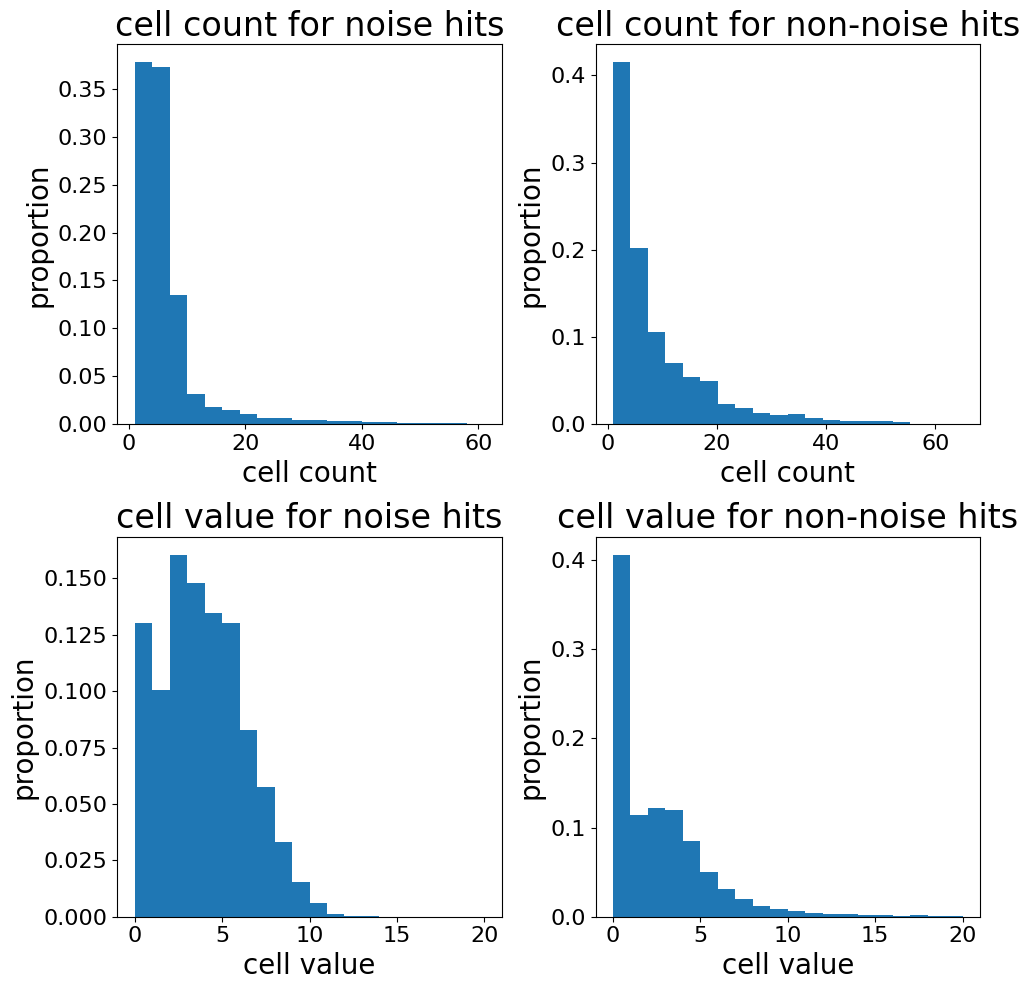

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

ax1.hist(noise_hits['cell_count'], 20, weights=np.ones(len(noise_hits)) / len(noise_hits))
ax1.set_title("cell count for noise hits")
ax1.set_xlabel("cell count")
ax1.set_ylabel("proportion")

ax2.hist(non_noise_hits['cell_count'], 20, weights=np.ones(len(non_noise_hits)) / len(non_noise_hits))
ax2.set_title("cell count for non-noise hits")
ax2.set_xlabel("cell count")
ax2.set_ylabel("proportion")

ax3.hist(noise_hits['cell_val'], 20, (0, 20), weights=np.ones(len(noise_hits)) / len(noise_hits))
ax3.set_title("cell value for noise hits")
ax3.set_xlabel("cell value")
ax3.set_ylabel("proportion")

ax4.hist(non_noise_hits['cell_val'], 20, (0, 20), weights=np.ones(len(non_noise_hits)) / len(non_noise_hits))
ax4.set_title("cell value for non-noise hits")
ax4.set_xlabel("cell value")
ax4.set_ylabel("proportion")

plt.tight_layout()

/global/homes/a/aoka/.conda/envs/exatrkx/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


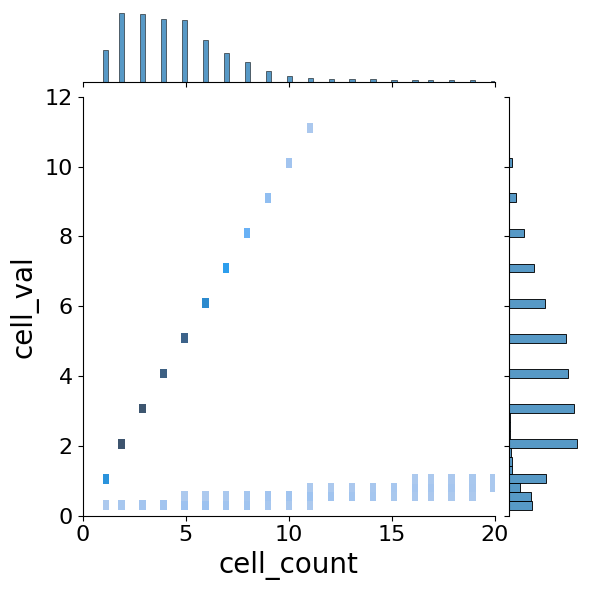

In [20]:
sns.jointplot('cell_count', 'cell_val', noise_hits, xlim=(0, 20), ylim=(0, 12), kind="hist")

/global/homes/a/aoka/.conda/envs/exatrkx/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


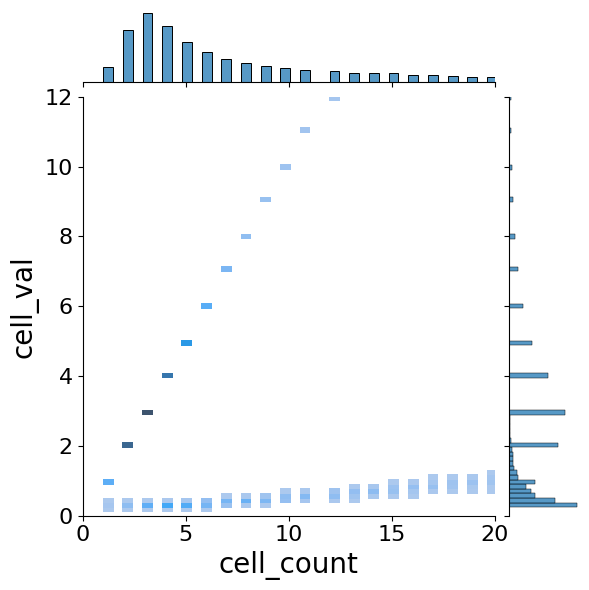

In [21]:
sns.jointplot('cell_count', 'cell_val', non_noise_hits, xlim=(0, 20), ylim=(0, 12), kind="hist")

In [ ]:
sns.jointplot('cell_count', 'cell_val', noise_hits, xlim=(0, 20), ylim=(0, 12), kind="hist")